In [244]:
import pandas as pd
import geopandas as gpd
from geobr import read_state
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [245]:
df = pd.read_excel('Dados/Resposta A 00 Brasil SIES - Adesao_municipios-final.xlsx', sheet_name='ufs_movimetacao', usecols='A:E')

In [246]:
df.head()

,UF,Municípios que movimentam SIES por UF,Região,Municipios por Estado,Percentual Estadual
0,AC,21,Norte,22,0.954545
1,AL,77,Nordeste,102,0.754902
2,AM,35,Norte,62,0.564516
3,AP,8,Norte,16,0.5
4,BA,323,Nordeste,417,0.77458


In [247]:
#estados brasileiros
estates = read_state(code_state='all', year=2020)

In [248]:
estates.drop(columns=['code_state', 'code_region', 'name_region'], inplace=True)

In [249]:
estates.head()

,abbrev_state,name_state,geometry
0,RO,Rondônia,"MULTIPOLYGON (((-65.3815 -10.42907, -65.38013 ..."
1,AC,Acre,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
2,AM,Amazônas,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,RR,Roraima,"MULTIPOLYGON (((-63.96008 2.47313, -63.96041 2..."
4,PA,Pará,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


In [250]:
df.columns = ['UF', 'Municipios que movimentam SIES por UF', 'Regiao', 'Municipios por Estado', 'Percentual Estadual']

In [251]:
estates.columns = ['UF', 'nome_estado', 'geometry']

In [252]:
#substituindo valores nulos por NaN
df['Percentual Estadual'] = pd.to_numeric(df['Percentual Estadual'],errors='coerce')

In [253]:
df['Percentual Estadual'] = df['Percentual Estadual'].astype('float64')

In [254]:
df['Percentual Estadual'] = df['Percentual Estadual'].fillna(-1)

In [255]:
df[df['UF'] == 'DF']

,UF,Municipios que movimentam SIES por UF,Regiao,Municipios por Estado,Percentual Estadual
6,DF,Sem informação,Centro-Oeste,1,-1.0


In [256]:
df = pd.merge(df, estates, on='UF', how='left')

In [257]:
df.head()

,UF,Municipios que movimentam SIES por UF,Regiao,Municipios por Estado,Percentual Estadual,nome_estado,geometry
0,AC,21,Norte,22,0.954545,Acre,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
1,AL,77,Nordeste,102,0.754902,Alagoas,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
2,AM,35,Norte,62,0.564516,Amazônas,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
3,AP,8,Norte,16,0.500000,Amapá,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
4,BA,323,Nordeste,417,0.774580,Bahia,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


In [258]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')

In [259]:
gdf.head(3)

,UF,Municipios que movimentam SIES por UF,Regiao,Municipios por Estado,Percentual Estadual,nome_estado,geometry
0,AC,21,Norte,22,0.954545,Acre,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
1,AL,77,Nordeste,102,0.754902,Alagoas,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
2,AM,35,Norte,62,0.564516,Amazônas,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."


In [260]:
print(gdf.columns)

Index(['UF', 'Municipios que movimentam SIES por UF', 'Regiao',
       'Municipios por Estado', 'Percentual Estadual', 'nome_estado',
       'geometry'],
      dtype='object')


In [261]:
cmap = ListedColormap(['gray', 'red', 'orange', 'yellow', 'green'])

In [262]:
# Criar as categorias
gdf['Adesao_Percentual_Estadual'] = pd.cut(
    gdf['Percentual Estadual'],
    bins=[-1, 0, 0.5, 0.85, 0.95, 1],
    labels=[0, 1, 2, 3, 4],  # Mapeia para índices de cores
    include_lowest=True
)

In [263]:
gdf.head(3)

,UF,Municipios que movimentam SIES por UF,Regiao,Municipios por Estado,Percentual Estadual,nome_estado,geometry,Adesao_Percentual_Estadual
0,AC,21,Norte,22,0.954545,Acre,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",4
1,AL,77,Nordeste,102,0.754902,Alagoas,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",2
2,AM,35,Norte,62,0.564516,Amazônas,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",2


In [264]:
gdf[gdf['Adesao_Percentual_Estadual'] == 4]

,UF,Municipios que movimentam SIES por UF,Regiao,Municipios por Estado,Percentual Estadual,nome_estado,geometry,Adesao_Percentual_Estadual
0,AC,21,Norte,22,0.954545,Acre,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",4
12,MT,141,Centro-Oeste,141,1.000000,Mato Grosso,"MULTIPOLYGON (((-61.54023 -10.00021, -61.54014...",4
13,PA,141,Norte,144,0.979167,Pará,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ...",4
23,SC,289,Sul,295,0.979661,Santa Catarina,"MULTIPOLYGON (((-48.60084 -28.35222, -48.60096...",4
25,SP,632,Sudeste,645,0.979845,São Paulo,"MULTIPOLYGON (((-48.03716 -25.35794, -48.0375 ...",4


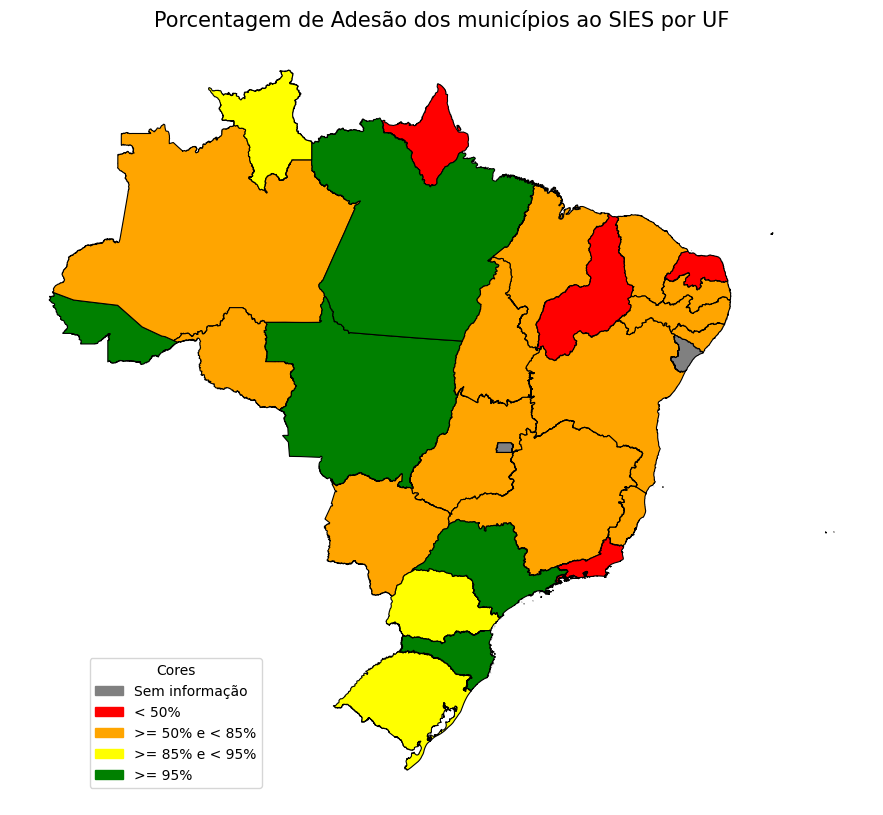

In [265]:
grafico = gdf.plot(column='Adesao_Percentual_Estadual', cmap=cmap, edgecolor='black', linewidth=0.8, legend=False, figsize=(15, 10))

grafico.set_title("Porcentagem de Adesão dos municípios ao SIES por UF", fontsize=15)

#remover os tucks e labels dos eixos
grafico.set_xticks([])
grafico.set_yticks([])
grafico.set_xticklabels([])
grafico.set_yticklabels([])

grafico.spines['top'].set_visible(False)
grafico.spines['right'].set_visible(False)
grafico.spines['bottom'].set_visible(False)
grafico.spines['left'].set_visible(False)

handles = [
    mpatches.Patch(color='gray', label='Sem informação'),
    mpatches.Patch(color='red', label='< 50%'),
    mpatches.Patch(color='orange', label='>= 50% e < 85%'),
    mpatches.Patch(color='yellow', label='>= 85% e < 95%'),
    mpatches.Patch(color='green', label='>= 95%')
]

plt.legend(
    handles=handles,
    title='Cores',
    bbox_to_anchor=(0.3, 0.2),
)

plt.savefig('Imagens/Adesão_UF.jpeg', dpi=600, bbox_inches='tight')

plt.show()
